# This is a beginder friendly notebook for data scientists. We will be exploring the Netflix user base data set 

In [1]:
import pandas as pd
import numpy as np

## I will first try to understand the data. Then i will try to find hidden information within the data

In [2]:
df = pd.read_csv("Netflix Userbase.csv")



In [3]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [4]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [5]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [6]:
df["Gender"].value_counts()

Female    1257
Male      1243
Name: Gender, dtype: int64

In [7]:
df["Plan Duration"].unique()

array(['1 Month'], dtype=object)

In [8]:
df[["Subscription Type","Monthly Revenue" , "Last Payment Date"]].tail(100)

,Subscription Type,Monthly Revenue,Last Payment Date
2400,Basic,11,11-07-23
2401,Premium,12,11-07-23
2402,Standard,15,11-07-23
2403,Standard,12,12-07-23
2404,Basic,12,11-07-23
...,...,...,...
2495,Premium,14,12-07-23
2496,Basic,15,14-07-23
2497,Standard,12,15-07-23
2498,Standard,13,12-07-23


### Lets create a column showing how long did the subscription last

In [9]:
starting = pd.to_datetime(df["Join Date"], format ='%d-%m-%y')
last = pd.to_datetime(df["Last Payment Date"], format = '%d-%m-%y')
days = last  - starting


df["Days"] = pd.Series(days).astype(str).str.split().apply(lambda x: x[0]).astype(int)

### Now i will try to find hidden information via plots

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

## 1- Is gender related to the sub period?

<Axes: xlabel='Gender', ylabel='Days'>

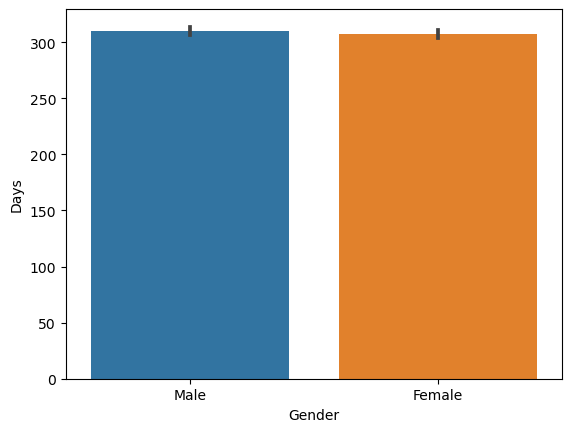

In [11]:
sns.barplot(data = df , x = "Gender" , y = "Days")

### No, the gender and sub period are not related

## 2- does the device used has a realtionship with sub period?

<Axes: xlabel='Device', ylabel='Days'>

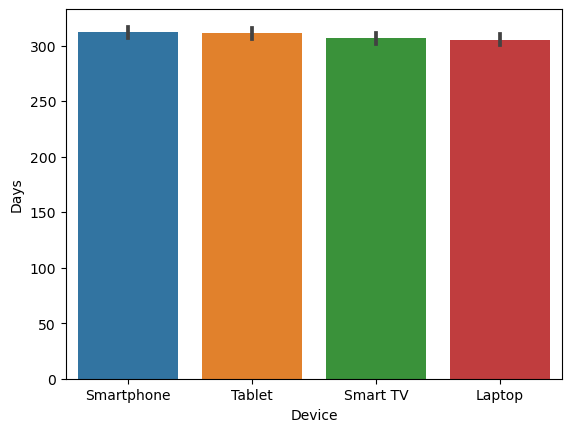

In [12]:
sns.barplot(data = df , x = "Device" , y = "Days")

### No it does not

## 3- does the Subscription Type has a realtionship with the subscription  period?

<Axes: xlabel='Subscription Type', ylabel='Days'>

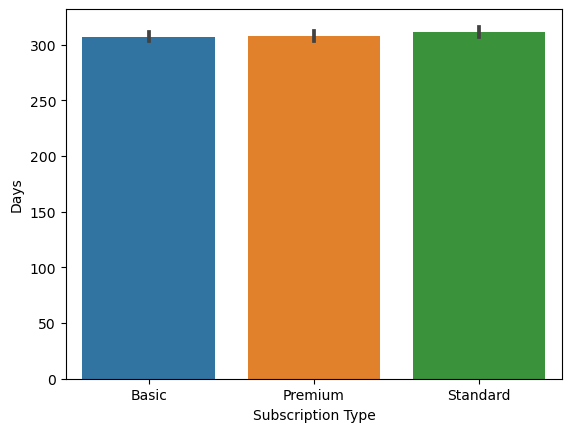

In [13]:
sns.barplot(data = df , x = "Subscription Type" , y = "Days" )

### No it does not

## 4- Age

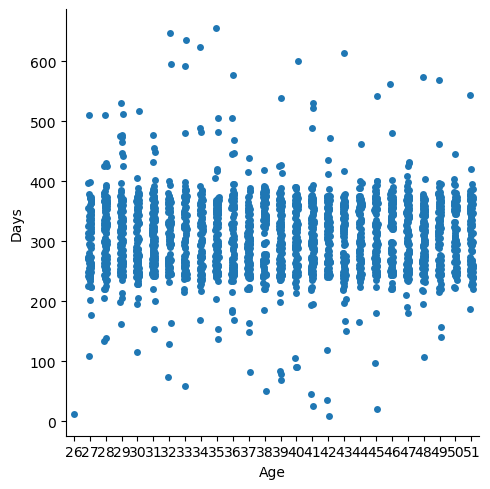

In [14]:
sns.catplot(data = df , x = "Age" , y = "Days")

# No 

## 5- Countries

<Axes: xlabel='Country'>

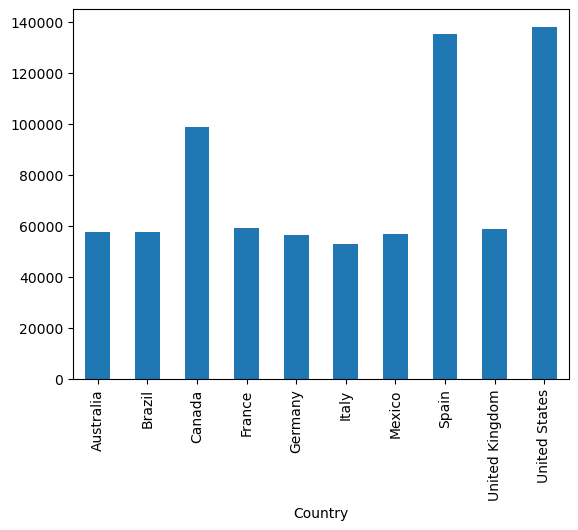

In [15]:
df.groupby("Country")["Days"].sum().plot(kind = "bar")

## There seem to be a vartion in the countries' subscription period 

## Lets Invistage the countries more. The number of members for each country is given by

In [16]:
df.groupby("Country")["User ID"].count().sort_values(ascending = False)

Country
Spain             451
United States     451
Canada            317
Australia         183
Brazil            183
France            183
Germany           183
Italy             183
Mexico            183
United Kingdom    183
Name: User ID, dtype: int64

## Lets see the vartion of subscription type for each country

<Axes: xlabel='Country,Type'>

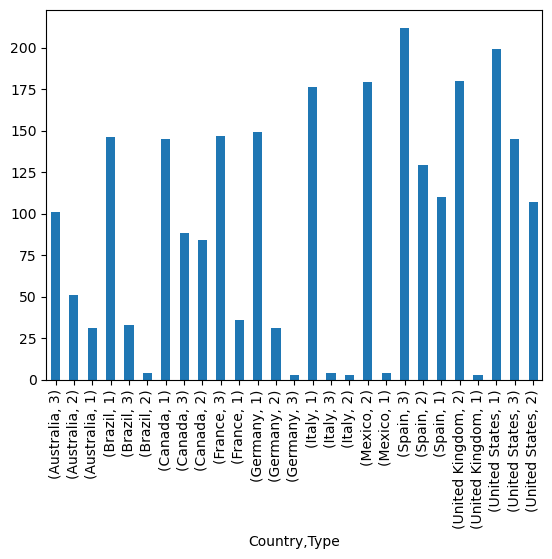

In [17]:
df["Type"] = df["Subscription Type"].apply(lambda x : "1" if(x == "Basic") else ("3" if(x == "Premium") else ("2")))
df.groupby("Country")["Type"].value_counts().plot(kind = "bar")

## There are many notes to take from this plot. A few of which:
   -  All of Austrila , Mexico and the United Kingdom have the same number of members in this data set. However,  according to the plot, Austrila had most of its subscription's type to be premium while in mexico and the UK there were not any premium subscibers.
 
   -  
   Even though both spain and the US had the highest Netflix members (451), most spain members choose the Premium type while most    US members choose the basic type of subscription .
   - France has no standard members
   - Almost all members from italy chose the basic type.
   

#

### Lets first try to invstiage why Australia has most of its subcribtion's type to be premium while Mexico and the UK had no premium members

### Lets study the age distribution in each country

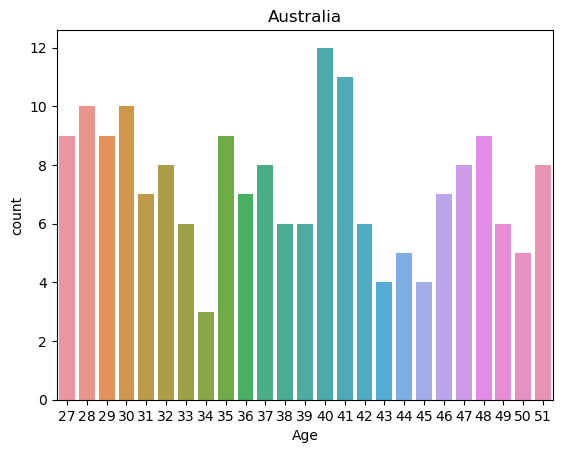

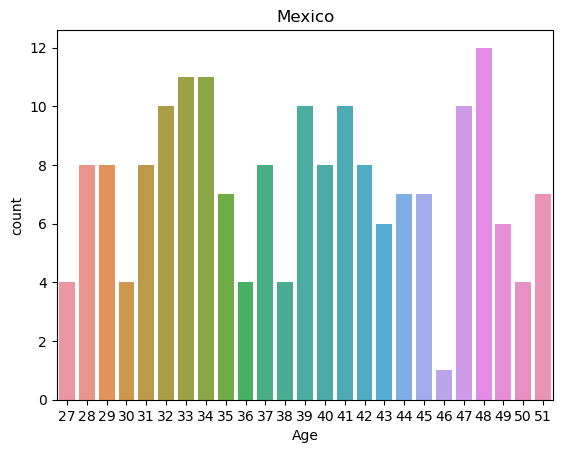

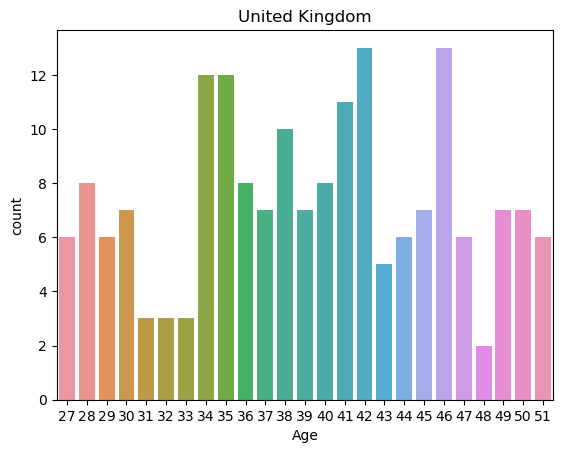

In [34]:
countries = ["United Kingdom" , "Australia" , "Mexico"]
dff= df[df["Country"].isin(countries)   ]

aust = dff[dff["Country"] =="Australia"]
sns.countplot(data = aust, x = "Age")
plt.title("Australia")
plt.show()
mex = dff[dff["Country"] =="Mexico"]
sns.countplot(data = mex, x = "Age")
plt.title("Mexico")
plt.show()
uk = dff[dff["Country"] =="United Kingdom"]
sns.countplot(data = uk, x = "Age")
plt.title("United Kingdom")
plt.show()

### We can clearly see that the UK and Mexico have more older netflix members than Australia. This could be intrepreted as: younger people tend to buy premium more often than older people do (at least in this data set).

### Implication:
   
   - Netflix might consider adding new features to the premium subscriton in such way that it attracts older people more , spicialy those in the UK and Mexico.